# nesis newt count data #

Some preliminary data analysis for the newt counts I've collected so far!

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [47]:
newts = pd.read_csv('data/newt count data - Sheet1.csv')

Here is pretty much my raw data table, just without a couple rows from the one time we counted in the afternoon as well.

In [ ]:
# remove that one time we counted the newts in the afternoon too
cleaned = newts.drop(newts.iloc[12:16].index).reset_index(drop=True)
cleaned.Date = pd.to_datetime(cleaned['Date'])
cleaned

,Trip Number,Date,Quadrant,Observer,Start Time,End Time,Adult Newts,Larvae,Egg Masses,Notes
0,1.0,2025-03-09,1,Kannon,10:08 AM,10:13 AM,1.0,4.0,150.0,NaN
1,1.0,2025-03-09,2,Erin,10:08 AM,10:13 AM,6.0,0.0,89.0,NaN
2,1.0,2025-03-09,3,Kannon,9:56 AM,10:01 AM,6.0,9.0,131.0,NaN
3,1.0,2025-03-09,4,Erin,9:56 AM,10:01 AM,10.0,7.0,24.0,NaN
4,2.0,2025-04-12,1,Kannon,9:47 AM,9:54 AM,12.0,7.0,17.0,kannon doesn't know how tally marks work
5,2.0,2025-04-12,2,Erin,9:48 AM,9:54 AM,8.0,12.0,39.0,"wrote ""1"" as quadrant. mistake from quadrant n..."
6,2.0,2025-04-12,3,Kannon,10:02 AM,10:08 AM,11.0,9.0,25.0,NaN
7,2.0,2025-04-12,4,Erin,10:03 AM,10:11 AM,14.0,16.0,6.0,NaN
8,3.0,2025-05-03,1,Army,9:44 AM,9:54 AM,9.0,2.0,0.0,NaN
9,3.0,2025-05-03,2,Army,9:57 AM,10:06 AM,8.0,8.0,7.0,NaN


In [58]:
adults_quad = cleaned.pivot_table(values = 'Adult Newts', index = 'Date', columns = 'Quadrant').reset_index()

Here's a graph showing the number of adult newts per quadrant. There is a lot of variability! Some of it may be explained by the fact that it was not always the same person counting each time. However, I think there's inherently a lot of variablility because even the two quadrants that I counted almost exclusively (3 and 4) have have quite a lot of variability. Perhaps in the future I can calculate regression lines and errors to see if the quadrants that I do have lower MSE than the other two...

Text(0.5, 1.0, 'Newts per Quadrant of Japanese Pool')

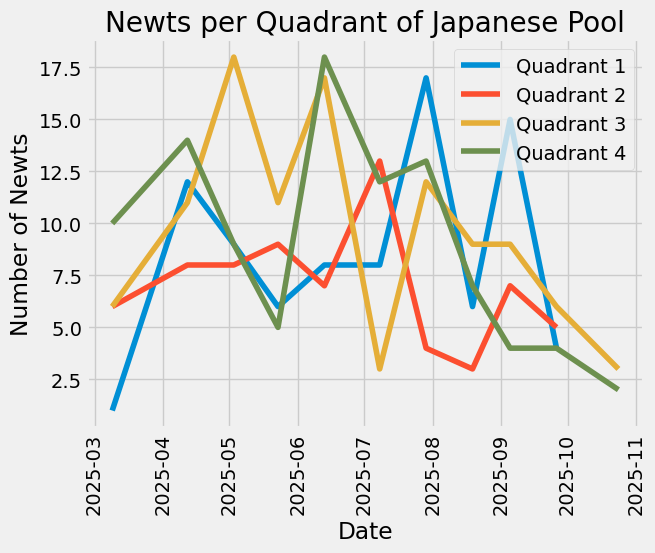

In [71]:
plt.plot(adults_quad['Date'], adults_quad[1], label = 'Quadrant 1')
plt.plot(adults_quad['Date'], adults_quad[2], label = 'Quadrant 2')
plt.plot(adults_quad['Date'], adults_quad[3], label = 'Quadrant 3')
plt.plot(adults_quad['Date'], adults_quad[4], label = 'Quadrant 4')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Newts')
plt.title('Newts per Quadrant of Japanese Pool')

In [65]:
adults_quad['Total'] = adults_quad[1] + adults_quad[2] + adults_quad[3] + adults_quad[4]
adults_quad.head()

Quadrant,Date,1,2,3,4,Total
0,2025-03-09,1.0,6.0,6.0,10.0,23.0
1,2025-04-12,12.0,8.0,11.0,14.0,45.0
2,2025-05-03,9.0,8.0,18.0,9.0,44.0
3,2025-05-23,6.0,9.0,11.0,5.0,31.0
4,2025-06-13,8.0,7.0,17.0,18.0,50.0


Here's a graph showing the total newt counts, summed from each of the 4 quadrants. This graph *seems* to have somewhat less variability than the individual quadrants... right?? From March, there is a general increase in newt count until we hit a peak around June, after which it decreases as we transition to fall. 

Text(0.5, 1.0, 'Monthly Newt Counts at the Japanese Pool')

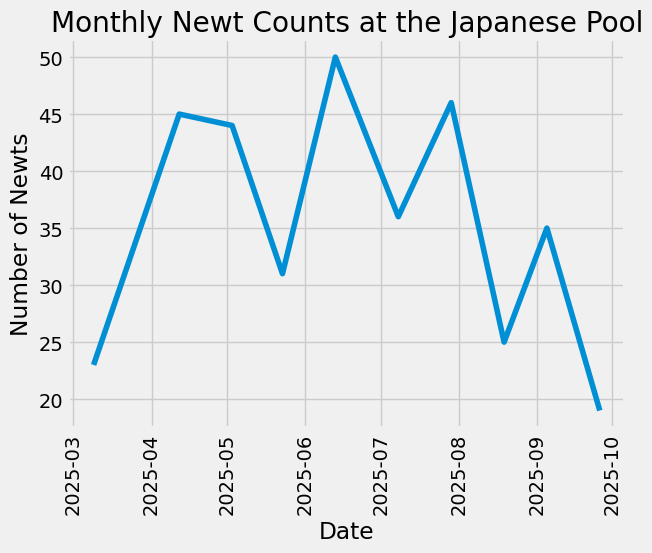

In [66]:
plt.plot(adults_quad['Date'], adults_quad['Total'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Newts')
plt.title('Monthly Newt Counts at the Japanese Pool')

In [72]:
larvae_quad = cleaned.pivot_table(values = 'Larvae', index = 'Date', columns = 'Quadrant').reset_index()
egg_quad = cleaned.pivot_table(values = 'Egg Masses', index = 'Date', columns = 'Quadrant').reset_index()

larvae_quad['Total'] = larvae_quad[1] + larvae_quad[2] + larvae_quad[3] + larvae_quad[4]
egg_quad['Total'] = egg_quad[1] + egg_quad[2] + egg_quad[3] + egg_quad[4]

egg_quad

Quadrant,Date,1,2,3,4,Total
0,2025-03-09,150.0,89.0,131.0,24.0,394.0
1,2025-04-12,17.0,39.0,25.0,6.0,87.0
2,2025-05-03,0.0,7.0,42.0,0.0,49.0
3,2025-05-23,0.0,0.0,0.0,0.0,0.0
4,2025-06-13,0.0,0.0,0.0,0.0,0.0
5,2025-07-08,0.0,0.0,0.0,0.0,0.0
6,2025-07-29,0.0,0.0,0.0,0.0,0.0
7,2025-08-19,0.0,0.0,0.0,0.0,0.0
8,2025-09-05,0.0,0.0,0.0,0.0,0.0
9,2025-09-26,0.0,0.0,0.0,0.0,0.0


Now here is our big cool graph with data for adult, larva, and egg mass counts! The egg masses high key inflate the y-axis, there's so freaking many of them around March! Interestingly, this does not coincide with the month with the most adults, which is a few months later around June. There can be multiple explanations for this: We tended to undercountin the first few months because we were not as experienced at counting newts, different people counting, etc. Or perhaps June is really month with the true largest number of newts, but by then many of the egg masses from earlier breeding have been eaten / hatched?

Either way, it's fun to see that the egg mass line looks like it has the least variance, which makes sense given egg masses are brightly colored and stationary and therefore much easier to count. This also eliminates the risk of double-counting. Larvae are definitely the most difficult to see, therefore it  would make sense that they probably have the most variability between counters. (skill issue)

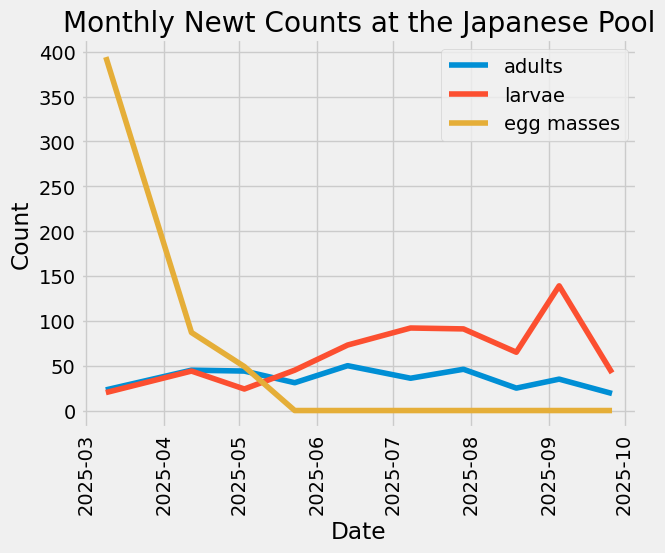

In [70]:
plt.plot(adults_quad['Date'], adults_quad['Total'], label = 'adults')
plt.plot(larvae_quad['Date'], larvae_quad['Total'], label = 'larvae')
plt.plot(egg_quad['Date'], egg_quad['Total'], label = 'egg masses')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Newt Counts at the Japanese Pool')
plt.legend()